In [2]:
#Print all the variables, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline   

# Clustering

### Hierarchical Clustering
类与类之间距离计算的方法：离差平方和法（ward）类平均法（average）最大距离法（complete）

In [5]:
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),fontdict={'weight': 'bold', 'size': 9},color=plt.cm.Spectral(labels[i] / 10.))
                 
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()


1797 64


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10,
                        pooling_func='deprecated')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=10,
                        pooling_func='deprecated')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=10,
                        pooling_func='deprecated')

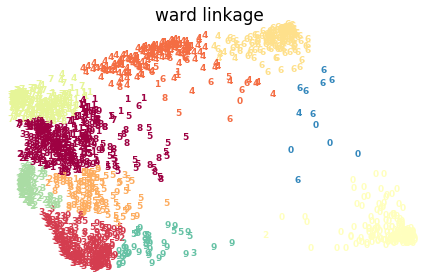

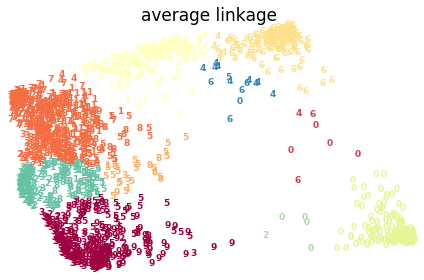

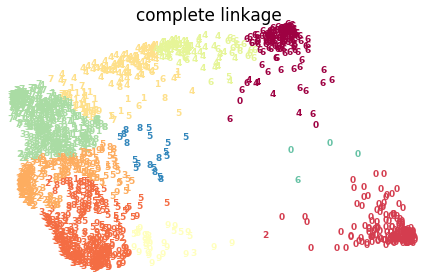

In [6]:
from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
# print(X[:5, :])
print(n_samples, n_features)

X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    clustering.fit(X_red)
    #plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


### K-means

In [7]:
#使用K-Means算法聚类消费行为特征数据

import pandas as pd

inputfile = 'consumption_data.xls' #销量及其他属性数据
k = 3 #聚类的类别
iteration = 500 #聚类最大循环次数
data = pd.read_excel(inputfile, index_col = 'Id') #读取数据
data_zs = 1.0*(data - data.mean())/data.std() #数据标准化

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分为k类，并发数4
model.fit(data_zs) #开始聚类

#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(data.columns) + [u'类别数目'] #重命名表头
print(r)

#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
r.to_excel(outputfile) #保存结果


def density_plot(data): #自定义作图函数
  import matplotlib.pyplot as plt
  plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
  p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
  [p[i].set_ylabel(u'密度') for i in range(k)]
  plt.legend()
  return plt

pic_output = '../tmp/pd_' #概率密度图文件名前缀
for i in range(k):
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


<Figure size 432x288 with 0 Axes>

[0, 5, 0, 5]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'k')

Text(0, 0.5, 'The average degree of distortion')

Text(0.5, 1.0, 'Best k')

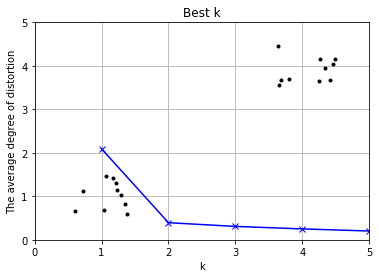

In [30]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
X = np.hstack((cluster1, cluster2)).T
plt.figure()
plt.axis([0, 5, 0, 5])
plt.grid(True)
plt.plot(X[:, 0], X[:, 1], 'k.')


from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

K = list(range(1, 10))
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('The average degree of distortion')
plt.title('Best k')


### 基于密度的方法：DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


/Users/ressnn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Text(0.5, 1.0, 'Estimated number of clusters: 3')

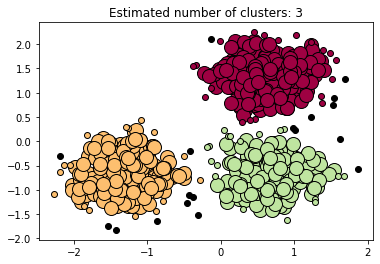

In [32]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


### 谱聚类

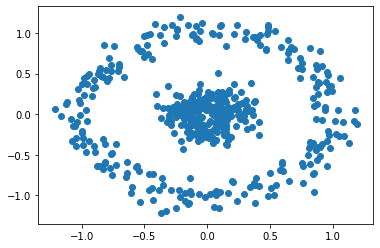

/Users/ressnn/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


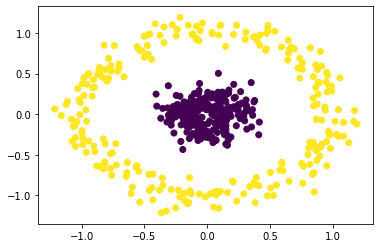

In [5]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering

 
# s生成数据
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)
 
# 可视化数据
plt.scatter(X[:, 0], X[:, 1])
plt.show()
 
# 训练和预测
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
 
# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)


# Dimension reduction

### Principal Component Analysis (PCA)

In [3]:
# 协方差矩阵
import numpy as np

X = [[2, 0, -1.4],
     [2.2, 0.2, -1.5],
     [2.4, 0.1, -1],
     [1.9, 0, -1.2]]
print(np.cov(np.array(X).T))

w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
print('特征值：{}\n特征向量：{}'.format(w, v))

[[ 0.04916667  0.01416667  0.01916667]
 [ 0.01416667  0.00916667 -0.00583333]
 [ 0.01916667 -0.00583333  0.04916667]]
特征值：[-0.99999998 -1.00000002]
特征向量：[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


In [14]:
from sklearn.decomposition import PCA

data = pd.read_excel('principal_component.xls', header = None) #读入数据

pca = PCA()
pca.fit(data)
pca.components_ #返回模型的各个特征向量
pca.explained_variance_ratio_ #返回各个成分各自的方差百分比


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

array([[ 0.56788461,  0.2280431 ,  0.23281436,  0.22427336,  0.3358618 ,
         0.43679539,  0.03861081,  0.46466998],
       [ 0.64801531,  0.24732373, -0.17085432, -0.2089819 , -0.36050922,
        -0.55908747,  0.00186891,  0.05910423],
       [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
        -0.20091919, -0.00124421,  0.80699041],
       [-0.19404741,  0.9021939 , -0.00730164, -0.01424541,  0.03106289,
         0.12563004,  0.11152105, -0.3448924 ],
       [-0.06133747, -0.03383817,  0.12652433,  0.64325682, -0.3896425 ,
        -0.10681901,  0.63233277,  0.04720838],
       [ 0.02579655, -0.06678747,  0.12816343, -0.57023937, -0.52642373,
         0.52280144,  0.31167833,  0.0754221 ],
       [-0.03800378,  0.09520111,  0.15593386,  0.34300352, -0.56640021,
         0.18985251, -0.69902952,  0.04505823],
       [-0.10147399,  0.03937889,  0.91023327, -0.18760016,  0.06193777,
        -0.34598258, -0.02090066,  0.02137393]])

array([7.74011263e-01, 1.56949443e-01, 4.27594216e-02, 2.40659228e-02,
       1.50278048e-03, 4.10990447e-04, 2.07718405e-04, 9.24594471e-05])

In [17]:
## 得到7个特征根和特征向量，以及对应的方差百分比（贡献率），百分比越大说明权重越大。  可以看到前3个主成分贡献率达95%
## 所以选3个主成分重新构建模型

pca=PCA(3)   # n_components
pca.fit(data)
low_d=pca.transform(data)
low_d
pca.inverse_transform(low_d)  # 复原数据

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

array([[  8.19133694,  16.90402785,   3.90991029],
       [  0.28527403,  -6.48074989,  -4.62870368],
       [-23.70739074,  -2.85245701,  -0.4965231 ],
       [-14.43202637,   2.29917325,  -1.50272151],
       [  5.4304568 ,  10.00704077,   9.52086923],
       [ 24.15955898,  -9.36428589,   0.72657857],
       [ -3.66134607,  -7.60198615,  -2.36439873],
       [ 13.96761214,  13.89123979,  -6.44917778],
       [ 40.88093588, -13.25685287,   4.16539368],
       [ -1.74887665,  -4.23112299,  -0.58980995],
       [-21.94321959,  -2.36645883,   1.33203832],
       [-36.70868069,  -6.00536554,   3.97183515],
       [  3.28750663,   4.86380886,   1.00424688],
       [  5.99885871,   4.19398863,  -8.59953736]])

array([[41.81945026, 17.92938537,  7.42743613,  6.38423781,  7.51911186,
         7.95581778,  1.89450158, 22.64634237],
       [26.03033486,  8.31048339, 11.0923029 , 10.50941053, 13.73592734,
        19.29219354,  1.55616178, 10.69991334],
       [12.8912027 ,  4.7200299 ,  4.15574756,  3.88084002,  4.15590258,
         5.95354081,  0.63142514,  3.10031979],
       [21.95107023,  7.86983692,  5.61296149,  5.00363184,  5.46598715,
         7.32692984,  1.00043437,  6.90279388],
       [33.2494621 , 16.9295226 ,  6.97070109,  6.54184048,  8.78799069,
         9.47854775,  1.76803069, 25.48379317],
       [35.30223656, 14.31635159, 16.19611986, 15.83211443, 22.51688172,
        30.25654088,  2.46591519, 25.94480913],
       [22.0404299 ,  7.67212745,  9.96458085,  9.59042702, 12.69748404,
        17.7402549 ,  1.39886681, 10.62704002],
       [47.82344306, 16.03581175, 11.11907058,  9.5362307 , 11.08119152,
        14.24461981,  2.12478649, 16.79265084],
       [40.72333307, 17.98533192

# Anomaly Detection

In [51]:
from sklearn.ensemble import IsolationForest
from scipy import stats

sample=pd.read_csv('tips.csv')

X_train=sample[['total_bill','tip']]

# fit the model
clf = IsolationForest(max_samples=256, random_state=None, contamination=0.01)
clf.fit(X_train)
# scores_pred = clf.decision_function(X_train)
# threshold = stats.scoreatpercentile(scores_pred, 100 * 0.02)  #根据训练样本中异常样本比例，得到阈值，用于绘图

y_pred_train = clf.predict(X_train)
y_pred_train    # 

for i in range(0,len(y_pred_train)):
    if y_pred_train[i]==-1:
        print(i)

/Users/ressnn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/ressnn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:274: UserWarning: max_samples (256) is greater than the total number of samples (244). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples=256, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

/Users/ressnn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

23
170
212


/Users/ressnn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.25,
                max_features=1.0, max_samples=200, n_estimators=100,
                n_jobs=None,
                random_state=<mtrand.RandomState object at 0x1a223933f0>,
                verbose=0, warm_start=False)

Text(0.5, 1.0, 'IsolationForest')

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

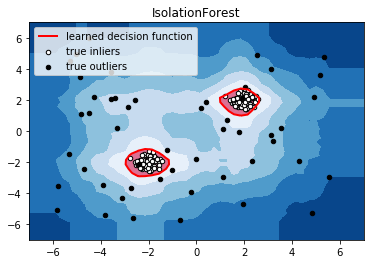

In [4]:
## iTree能有效检测异常的假设是：异常点一般都是非常稀有的，在iTree中会很快被划分到叶子节点，因此可以用叶子节点到根节点的路径h(x)长度来判断一条记录x是否是异常点。
## iForest算法主要有两个参数：一个是二叉树的个数；另一个是训练单棵 iTree 时候抽取样本的数目。实验表明，当设定为 100 棵树，抽样样本数为 256 条的时候，iForest在大多数情况下就已经可以取得不错的效果。这也体现了算法的简单、高效。

rng = np.random.RandomState(42)
 
# 构造训练样本
n_samples = 200  # 样本总数
outliers_fraction = 0.25  # 异常样本比例
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
 
X = 0.3 * rng.randn(n_inliers // 2, 2)
X_train = np.r_[X + 2, X - 2]   # 正常样本
X_train = np.r_[X_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]  #正常样本加上异常样本
 
# fit the model
clf = IsolationForest(max_samples=n_samples, random_state=rng, contamination=outliers_fraction)
clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(X_train)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图
 
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.title("IsolationForest")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)  #绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  #绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  #绘制正常点区域，值从阈值到最大的那部分
 
b = plt.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',
                    s=20, edgecolor='k')
c = plt.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',
                    s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper left")
